# Пример работы с данными


In [1]:
#Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?');
data.shape

(690, 16)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data['A5'][687]

'p'

In [6]:
data.at[687, 'A5']

'p'

In [7]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [8]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)


['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']


In [9]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [10]:
for c in categorical_columns:
    print(data[c].unique())


['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


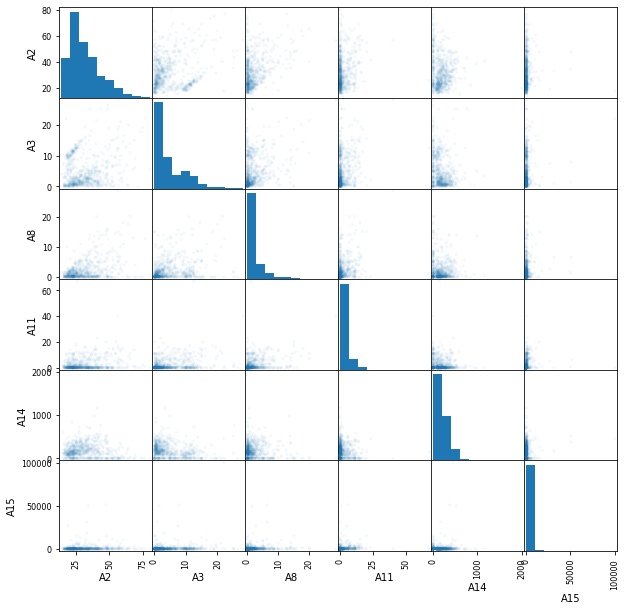

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));


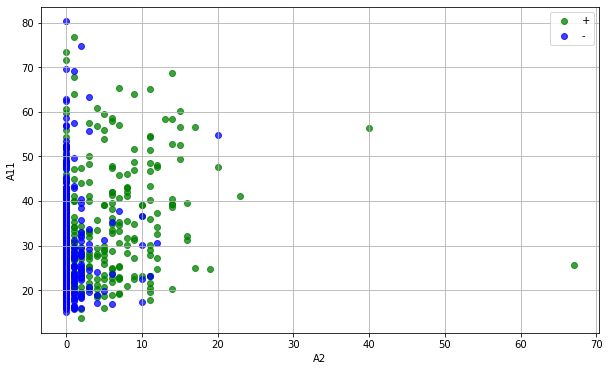

In [14]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col2][data['class'] == '+'],
            data[col1][data['class'] == '+'],
            alpha=0.75,
            color='green',
            label='+')
plt.grid()

plt.scatter(data[col2][data['class'] == '-'],
            data[col1][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');


In [ ]:
data.count(axis=0)

In [ ]:
data = data.fillna(data.median(axis=0), axis=0)

In [ ]:
data.count(axis=0)

In [ ]:
data['A1'].describe()

In [ ]:
data['A1'] = data['A1'].fillna('b')

In [ ]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])


In [ ]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


In [ ]:
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()


In [ ]:
data_describe = data.describe(include=[object])
data_describe


In [ ]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1



In [ ]:
data[binary_columns].describe()

In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns


In [ ]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()


In [ ]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
data.shape, data.columns


In [ ]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
feature_names


In [ ]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
feature_names
X.shape
y.shape
N, d = X.shape
N,d


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


In [ ]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)


### Спасибо за внимание
